In [724]:
# import needed libraries 
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [725]:
# creating symbolic function and derivative
x = sym.symbols('x')
fx = 3*x**2 - 3*x + 4
dx = fx.diff()
dx.evalf(subs={x:3})

15.0000000000000

In [726]:
# random starting point
choiceRange = np.linspace(-2,2,2001)
localMin = np.random.choice(choiceRange,1)
initialValue = localMin[:]

# learning parameters 
learning_rate = .01
training_epochs = 50

# iterate thru training and store results
modelParamsFixedLR = np.zeros((training_epochs,3))
for i in range(training_epochs):
    # computing gradient
    grad = dx.evalf(subs={x:float(localMin)})

    # non-adaptive learning rate
    lr = learning_rate

    # update parameter according to g.d
    localMin = localMin - lr * grad

    # storing parameters 
    modelParamsFixedLR[i,0] = localMin
    modelParamsFixedLR[i,1] = grad 
    modelParamsFixedLR[i,2] = lr

# Using dynamic Learning Rate

In [727]:
# random starting point
choiceRange = np.linspace(-2,2,2001)
localMin = np.random.choice(choiceRange,1)
initialValue = localMin[:]

mins = []
minAmountToStore = 5
localMinChangeThresh = 0.1

# learning parameters 
learning_rate = .01
training_epochs = 50

# iterate thru training and store results
modelParamsDynaLR = np.zeros((training_epochs,3))
for i in range(training_epochs):
    # storing last several local minimums
    if len(mins) < minAmountToStore:
        mins.append(float(localMin))
    else:
        mins.pop(0)
        mins.append(float(localMin))
    
    # increase lr when the localMin is within the change threshold
    # keeps from getting stuck in localMins
    # rewards it for going the right direction
    if(np.absolute(localMin-np.average(mins)) < localMinChangeThresh):
        lr += 0.001
    else:
        lr -= 0.001
        
    # computing gradient
    grad = dx.evalf(subs={x:float(localMin)})

    # update parameter according to g.d
    localMin = localMin - lr * grad

    # storing parameters 
    modelParamsDynaLR[i,0] = localMin
    modelParamsDynaLR[i,1] = grad 
    modelParamsDynaLR[i,2] = lr

# Plotting results

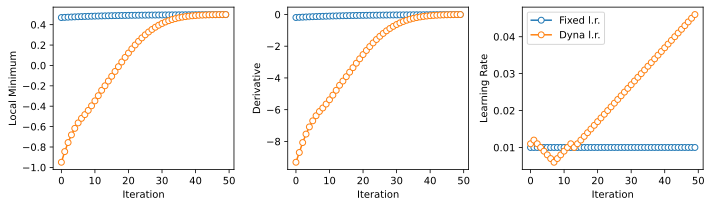

In [728]:
fix, ax = plt.subplots(1,3,figsize=(10,3))

# generating plots
for i in range(3):
    ax[i].plot(modelParamsFixedLR[:,i],'o-',markerfacecolor='w')
    ax[i].plot(modelParamsDynaLR[:,i], 'o-',markerfacecolor='w')
    ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local Minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning Rate')
ax[2].legend(['Fixed l.r.','Dyna l.r.'])

plt.tight_layout()
plt.show()
